In [8]:
set scheme s1mono

In [9]:
import delimited "/Users/santerivaataja/Desktop/Taloustieteen_kursseja/Econometrics/Capstone.nosync/Econometrics-Capstone/raw_data/master.csv", clear  bindquote(nobind)

(105 vars, 9,854 obs)


In [10]:
destring democracy, replace force
destring year, replace force
destring civilsocietytraditions, replace force
gen civil_d = civilsocietytraditions < 5
destring rol, replace force
gen rol_d = rol > 0
sort country year
bysort country: gen democracy_chg = democracy - democracy[_n - 1]


democracy: contains nonnumeric characters; replaced as byte
(1294 missing values generated)

year: contains nonnumeric characters; replaced as int
(288 missing values generated)

civilsocietytraditions already numeric; no replace


rol already numeric; no replace



(1,475 missing values generated)


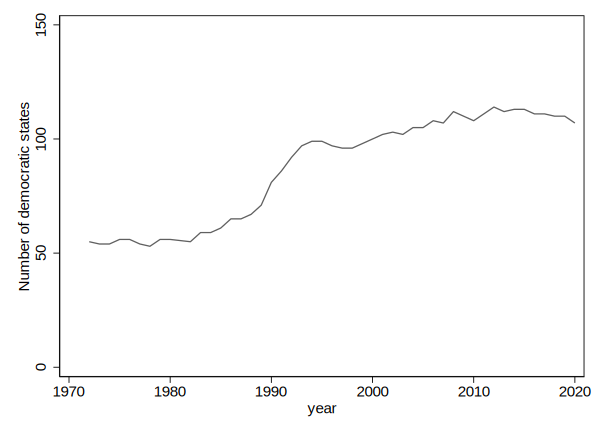

In [4]:
qui {
    preserve
    collapse (sum) democracy, by(year)
    line democracy year if year >= 1970, ysc(r(50 150)) ytitle("Number of democratic states") //ylabel(50(10)150)
    graph export "saved_outputs/n_dem.pdf", replace
    restore
}

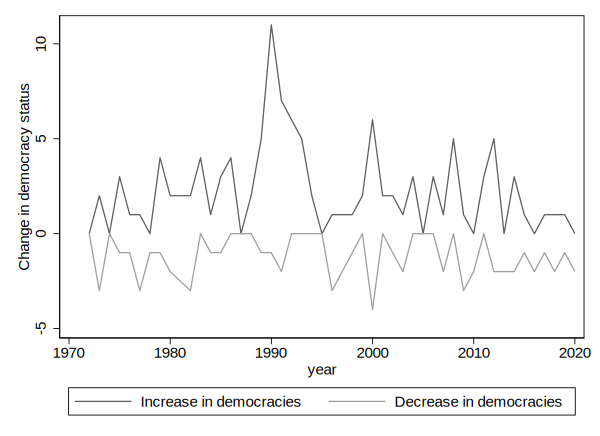

In [5]:
qui {
    preserve
    egen new_dem = group(year democracy_chg) if democracy_chg == 1, label
    egen not_dem = group(year democracy_chg) if democracy_chg == -1, label
    collapse (count) new_dem (count) not_dem, by(year)
    replace not_dem = -not_dem
    twoway line new_dem year if year >= 1970 || /// 
        line not_dem year if year >= 1970, ///
        ytitle("Change in democracy status") ///
        legend(label(1 "Increase in democracies") label(2 "Decrease in democracies"))
    graph export "saved_outputs/change_in_dem.pdf", replace
    restore
}

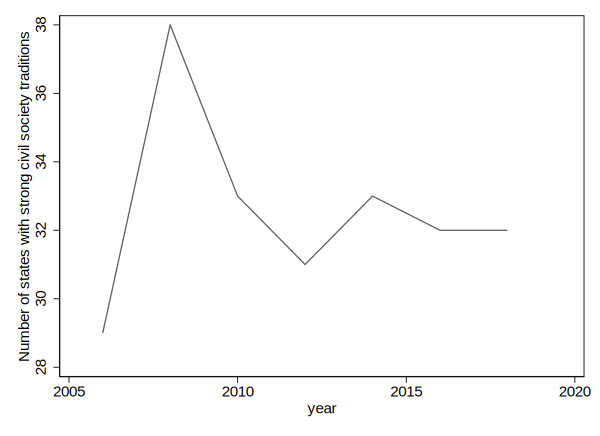

In [15]:
qui {
    preserve
    collapse (sum) civil_d, by(year)
    line civil_d year if year >= 2006 & mod(year, 2) == 0 & year < 2020, ytitle("Number of states with strong civil society traditions") //ylabel(50(10)150) ysc(r(50 150))
    graph export "saved_outputs/civil_d.pdf", replace
    restore
}

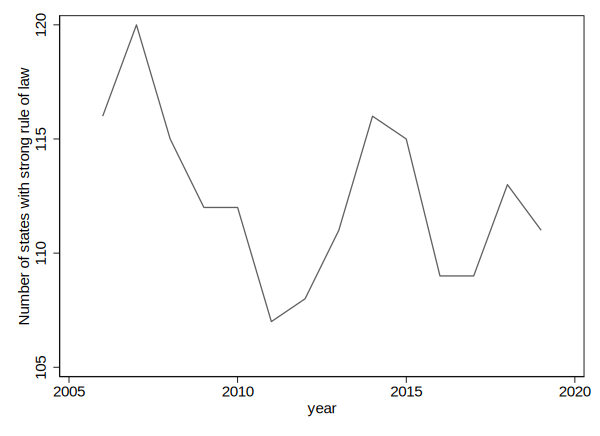

In [25]:
qui {
    preserve
    collapse (sum) rol_d, by(year)
    line rol_d year if year >= 2006 & year <= 2019, ytitle("Number of states with strong rule of law") //ylabel(50(10)150) ysc(r(50 150))
    graph export "saved_outputs/rol_d.pdf", replace
    restore
}